# Atividade 01

## 1) Monte um passo a passo para o Bagging

- Primeiro, criamos vários subconjuntos de dados a partir do conjunto de dados original, usando amostragem aleatória com reposição (bootstrap).

- Em seguida, treinamos um modelo base (como uma árvore de decisão) em cada subconjunto de dados, usando os mesmos hiperparâmetros.

- Por fim, agregamos as previsões dos modelos base, usando uma regra de votação (para problemas de classificação) ou uma média (para problemas de regressão).

## 2) Explique com suas palavras o Bagging

Bagging é uma forma de combinar vários modelos simples para criar um modelo mais complexo e melhor.

Usa se dados aleatórios para treinar cada modelo simples, e depois usa a opinião da maioria ou a média para decidir a resposta final.

O Bagging é útil para evitar que os modelos simples se ajustem demais aos dados e não consigam se adaptar a novas situações.

## 3) Implementar em pythono código do Bagging

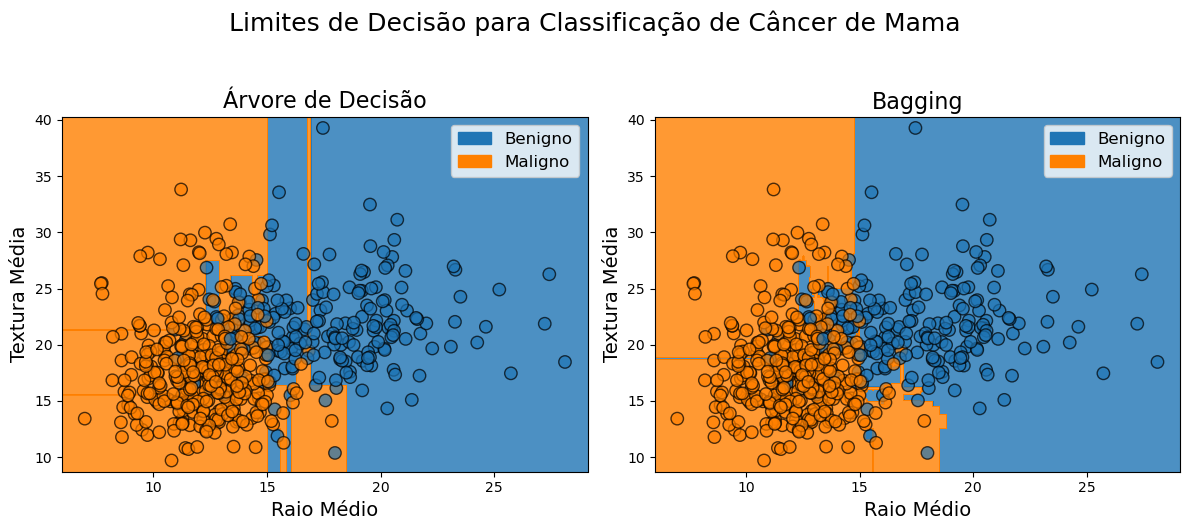

+-------------------------------+----------+
|             Modelo            | Precisão |
+-------------------------------+----------+
| Precisão da Árvore de Decisão |   0.84   |
|      Precisão do Bagging      |   0.89   |
+-------------------------------+----------+


In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from prettytable import PrettyTable
from sklearn.feature_selection import SelectFromModel

# Define plot_decision_boundaries
def plot_decision_boundaries(X, y, classificadores, titulos):
    # Define os limites do gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    cores = ListedColormap([(0.12, 0.46, 0.71), (1.0, 0.5, 0.0)])
    
    # Verifica se foi passado apenas um classificador
    if len(classificadores) == 1:
        # Cria o subgráfico
        fig, ax = plt.subplots(figsize=(6, 5))
        # Calcula as previsões para cada ponto do gráfico
        Z = classificadores[0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # Plota os limites de decisão
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=cores)
        # Adiciona os pontos do conjunto de dados
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cores, s=80, edgecolor='k', alpha=0.7)
        # Adiciona rótulos e legendas
        ax.set_xlabel('Raio Médio', fontsize=14)
        ax.set_ylabel('Textura Média', fontsize=14)
        ax.set_title(titulos[0], fontsize=16)
        legend_labels = ['Benigno', 'Maligno']
        ax.legend(handles=[Rectangle((0, 0), 1, 1, color=color, label=label)
                           for label, color in zip(legend_labels, cores.colors)], labels=legend_labels, loc='upper right', fontsize=12)
        # Adiciona título geral
        plt.suptitle('Limites de Decisão para Classificação de Câncer de Mama', fontsize=18, y=1.05)
        plt.tight_layout()
        plt.show()
    else:
        # Cria os subgráficos
        fig, axes = plt.subplots(1, len(classificadores), figsize=(12, 5))
        for clf, titulo, ax in zip(classificadores, titulos, axes):
            # Calcula as previsões para cada ponto do gráfico
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            # Plota os limites de decisão
            ax.contourf(xx, yy, Z, alpha=0.8, cmap=cores)
            # Adiciona os pontos do conjunto de dados
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cores, s=80, edgecolor='k', alpha=0.7)
            # Adiciona rótulos e legendas
            ax.set_xlabel('Raio Médio', fontsize=14)
            ax.set_ylabel('Textura Média', fontsize=14)
            ax.set_title(titulo, fontsize=16)
            legend_labels = ['Benigno', 'Maligno']
            ax.legend(handles=[Rectangle((0, 0), 1, 1, color=color, label=label)
                               for label, color in zip(legend_labels, cores.colors)], labels=legend_labels, loc='upper right', fontsize=12)
        # Adiciona título geral
        plt.suptitle('Limites de Decisão para Classificação de Câncer de Mama', fontsize=18, y=1.05)
        plt.tight_layout()
        plt.show()

# Carrega os dados de câncer de mama
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]  # Usa apenas as duas primeiras características

# Divide os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Treina um classificador de árvore de decisão
arvore_clf = DecisionTreeClassifier(random_state=42)
arvore_clf.fit(X_treino, y_treino)

# Aplica Bagging com árvores de decisão
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_treino, y_treino)

# Avalia o desempenho dos modelos de árvore de decisão e Bagging
precisao_arvore = round(accuracy_score(y_teste, arvore_clf.predict(X_teste)), 2)
precisao_bagging = round(accuracy_score(y_teste, bagging_clf.predict(X_teste)), 2)

# Plota os limites de decisão
plot_decision_boundaries(X, y, [arvore_clf, bagging_clf], ['Árvore de Decisão', 'Bagging'])

# Imprime a precisão dos modelos de árvore de decisão e Bagging
tabela = PrettyTable()
tabela.field_names = ["Modelo", "Precisão"]
tabela.add_row(["Precisão da Árvore de Decisão", precisao_arvore])
tabela.add_row(["Precisão do Bagging", precisao_bagging])

print(tabela)

- A aplicação do bagging gerou um leve aumento de 0.05 na precisão

# Atividade 02

## 1) Monte um passo a passo para o algoritmo RF

Amostragem com Reposição (Bootstrap):
- Inicialmente, é feita uma amostragem aleatória com reposição a partir do conjunto de dados original para criar vários subconjuntos de dados.

Criação de Árvores de Decisão:
- Em seguida, em cada subconjunto de dados, é treinada uma árvore de decisão. Cada árvore é treinada de forma independente e pode usar uma amostragem aleatória dos recursos em cada divisão do nó.

Agregação de Previsões:
- As previsões de cada árvore de decisão são agregadas para formar a previsão final do Random Forest. Na classificação, isso pode ser feito por meio de votação majoritária, enquanto na regressão, é realizada uma média das previsões.

## 2) Explique com suas palavras o Randomforest

Random Forest é um algoritmo de aprendizado de máquina que usa vários modelos de árvores de decisão, que são como fluxogramas que fazem perguntas sobre os dados. Ele treina cada árvore com uma parte dos dados e algumas características escolhidas ao acaso. Depois, ele combina as respostas de todas as árvores para dar uma resposta final.

## 3) Qual a diferença entre Bagginge Random Forest?

Bagging é uma forma de juntar vários modelos de aprendizado de máquina para melhorar o resultado final, onde cada modelo é treinado com uma parte diferente dos dados.

Random Forest por sua vez é uma técnica específica de bagging que usa árvores de decisão como modelos base.

## 4) Implemente em python o Random Forest

- Bootstrap
- Feature selection
- Modelagem com Decision trees
- Agregação

In [2]:
class RandomForestCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, bootstrap=True, random_state=None):
        # Inicialização dos parâmetros da Random Forest
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.random_state = random_state
        # Lista para armazenar os estimadores e índices das características
        self.estimators = []
        self.feature_indices = []
        
    def fit(self, X, y):
        # Definindo a seed para reprodutibilidade
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            # Selecionando índices aleatórios para amostragem com ou sem reposição (Bootstrap)
            indices = np.random.choice(len(X), len(X), replace=self.bootstrap)
            # Selecionando aleatoriamente um subconjunto de características (Feature selection)
            self.feature_indices.append(np.random.choice(X.shape[1], int(np.sqrt(X.shape[1])), replace=False))
            # Criando e treinando um classificador de árvore de decisão (Decision Trees)
            clf = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            clf.fit(X[indices][:, self.feature_indices[-1]], y[indices])
            self.estimators.append(clf)
            
    def predict(self, X):
        # Fazendo previsões para cada estimador na floresta e calculando a média (Agregação)
        predictions = [clf.predict(X[:, self.feature_indices[i]]) for i, clf in enumerate(self.estimators)]
        return np.mean(predictions, axis=0) >= 0.5

# Usando a implementação personalizada da Random Forest
rf_custom = RandomForestCustom(n_estimators=100, random_state=42)
rf_custom.fit(X_treino, y_treino)
precisao_rf_custom = round(accuracy_score(y_teste, rf_custom.predict(X_teste)), 2)
print("Precisão da RF Personalizada:", precisao_rf_custom)

Precisão da RF Personalizada: 0.79


# Atividade 03

## 1) Quais são os hyperparâmetros do RF?

Os principais hyperparâmetros do algoritmo Random Forest são:

- n_estimators: Este hyperparâmetro define o número de árvores de decisão na floresta. Um valor maior geralmente leva a um modelo mais robusto, mas também aumenta o tempo de treinamento.

- max_depth: Controla a profundidade máxima de cada árvore na floresta. Isso pode ajudar a evitar o sobreajuste (overfitting). Se não for definido, os nós são expandidos até que todas as folhas sejam puras ou contenham menos que min_samples_split amostras.

- min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Isso ajuda a evitar divisões que levam a nós com poucas amostras, o que pode levar ao sobreajuste.

- bootstrap: Um booleano que indica se deve ser usada amostragem com reposição (True) ou sem reposição (False) ao construir árvores.

- random_state: Controla a aleatoriedade do processo de treinamento, garantindo que os resultados sejam reproduzíveis.

## 2) Para que serve cada um deles?

- n_estimators: Controla a complexidade do modelo, adicionando mais árvores à floresta, o que pode melhorar a generalização e a robustez.

- max_depth: Ajuda a controlar a complexidade das árvores individuais, evitando que elas se tornem muito profundas e sobreajustem os dados.

- min_samples_split: Define o número mínimo de amostras necessárias para dividir um nó interno, o que ajuda a regularizar as árvores, evitando divisões que produziriam ramos com poucas amostras.

- bootstrap: Controla se a amostragem é realizada com reposição, o que pode introduzir mais diversidade nos conjuntos de dados usados para treinar cada árvore.

- random_state: Garante a reprodutibilidade dos resultados, fixando a semente aleatória para que os mesmos resultados sejam obtidos em diferentes execuções do modelo.

## 3) Exemplo de aplicação de alguns hiperparâmetros:

In [8]:
# Carregando os dados e mantendo apenas as duas primeiras características
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]

# Dividindo os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Configurando o classificador Random Forest com alguns hyperparâmetros específicos
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, bootstrap=True, random_state=42)
                                                                                                                  #^
                                                                                                      #Sabia que 42 é comumente usado po causa do livro O Guia do Mochileiro das Galáxias?
# Treinando o modelo
rf_clf.fit(X_treino, y_treino)

# Avaliando a precisão do modelo
precisao_rf = round(accuracy_score(y_teste, rf_clf.predict(X_teste)), 2)
print("Precisão do Random Forest:", precisao_rf)

Precisão do Random Forest: 0.91
